<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Visualisierung und Datenbanken</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>MCI</b></font></div>
        </td>
    </tr>
</table>

---

# 3.6 Gene Expression Data

Based on a differential gene expression data set published in the [GEO database](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE197653), we want to analyze, whether water pipe smokers show different gene expressions than non-smokers, which could indicate whether smoking causes cancer.

✍️  **Task**

Upload the [`waterpipe.txt`](https://github.com/jhumci/BLT_BDS/blob/main/data/Waterpipe.txt) file. In the DataFrame, You see the RPKM (Reads per kilo base of transcript per million mapped reads) values for over fifty thousand genes and nine subjects, of which some are smokers, some are not.

In [3]:
import pandas as pd

df = pd.read_csv("Waterpipe.txt", sep ="\t", on_bad_lines='skip')
#df = pd.read_csv("https://raw.githubusercontent.com/jhumci/BLT_BDS/main/data/Waterpipe.txt", sep ="\t", on_bad_lines='skip')
df

,NAME,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63
0,DDX11L1,0.000000,0.000000,0.000000,0.000000,1.025659,0.000000,2.160159,0.000000,1.434665
1,WASH7P,23.286576,26.391825,13.629300,27.278400,13.333567,36.176008,24.841831,28.991420,27.258634
2,MIR6859-1,1.164329,5.460378,4.193631,6.418447,10.256590,1.644364,9.720717,1.610634,12.911985
3,MIR1302-2HG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
58730,AC240274.1,353.955955,260.277999,223.310833,286.423199,366.160268,120.038571,224.656561,260.922783,278.324999
58731,RF00003.14,12.807617,3.640252,12.580892,8.825365,4.102636,17.265822,15.121115,3.221269,2.869330
58732,RF00003.15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
58733,AC213203.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


✍️ **Task**

Visit the [data source](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE197653) and create a Dictionary that stores wheather each subset ist a cigarette and / or waterpipe smoker

In [4]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

dict ={
    "Hu63": {"waterpipe smoking history": "No",
    "cigarette smoking history": "No"},
     "Hu56": {"waterpipe smoking history": "No",
    "cigarette smoking history": "No"},   
     "Hu53": {"waterpipe smoking history": "Yes",
    "cigarette smoking history": "No"},  
     "Hu52": {"waterpipe smoking history": "No",
    "cigarette smoking history": "No"},   
     "Hu51": {"waterpipe smoking history": "Yes",
    "cigarette smoking history": "No"},   
     "Hu44": {"waterpipe smoking history": "No",
    "cigarette smoking history": "No"}, 
     "Hu40": {"waterpipe smoking history": "Yes",
    "cigarette smoking history": "No"},
     "Hu35": {"waterpipe smoking history": "No",
    "cigarette smoking history": "No"},     
     "Hu28": {"waterpipe smoking history": "Yes",
    "cigarette smoking history": "No"}   
}

## 3.6.1 Fold change - log2FC

Next, we calculate the log2  Fold Change (log2FC) as we did in the lecture. The non-smokers are the control group, while the smokers are the treatment group.

✍️ **Task**

Caclulate the log2FC based on the following subsample (`X_subsample`) with only one observation from the treatment and one from the control group.

*Hint*:
Create a new column (`log2FC`) in the DataFrame and use the `numpy` function `log2()`. 

🤓 **Bonus**

Can You find the five genes with the highest absolute log2FC?

*Hint*
- Remove all genes where the expression on one of the samples is zero
- Use the [sort function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

In [64]:
X_subsample=df[["NAME","Hu63","Hu51"]]
X_subsample

,NAME,Hu63,Hu51
0,DDX11L1,1.434665,1.025659
1,WASH7P,27.258634,13.333567
2,MIR6859-1,12.911985,10.256590
9,AL627309.1,2.869330,1.025659
12,AL627309.6,11.477320,10.256590
...,...,...,...
58722,AC023491.1,0.000000,0.000000
58724,AC004556.1,0.000000,52.308610
58729,AC233755.1,0.000000,0.000000
58730,AC240274.1,278.324999,366.160268


In [65]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

import numpy as np
X_subsample["log2FC"] = np.log2(X_subsample["Hu51"]/X_subsample["Hu63"])
X_subsample

C:\Users\jlhuber\AppData\Local\Temp\ipykernel_7084\2045420655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subsample["log2FC"] = np.log2(X_subsample["Hu51"]/X_subsample["Hu63"])


,NAME,Hu63,Hu51,log2FC
0,DDX11L1,1.434665,1.025659,-0.484163
1,WASH7P,27.258634,13.333567,-1.031650
2,MIR6859-1,12.911985,10.256590,-0.332160
9,AL627309.1,2.869330,1.025659,-1.484163
12,AL627309.6,11.477320,10.256590,-0.162235
...,...,...,...,...
58722,AC023491.1,0.000000,0.000000,NaN
58724,AC004556.1,0.000000,52.308610,inf
58729,AC233755.1,0.000000,0.000000,NaN
58730,AC240274.1,278.324999,366.160268,0.395705


In [66]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
X_subsample["abs(log2FC)"]=np.abs(X_subsample["log2FC"])
X_subsample[X_subsample["abs(log2FC)"]!=float("inf")].sort_values(by=['abs(log2FC)'],ascending=False).head(5)
#X_subsample.sort_values(by=['abs(log2FC)'],ascending=False).head(50)

C:\Users\jlhuber\AppData\Local\Temp\ipykernel_7084\432928729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subsample["abs(log2FC)"]=np.abs(X_subsample["log2FC"])


,NAME,Hu63,Hu51,log2FC,abs(log2FC)
7397,MARCO,400.271520,1.025659,-8.608284,8.608284
58706,RNA5-8SN2.5,8940.831941,26.667134,-8.389202,8.389202
24690,XIST,4156.224348,17.436203,-7.897044,7.897044
56128,UTY,2.869330,609.241454,7.730156,7.730156
58425,B3GALT5,1.434665,208.208780,7.181173,7.181173


### 🏁 Recap

- 🟥 If you have not finished the tasks, place the red card on top.
- 🟩 If you have finished the tasks and have no questions and want to proceed, place the green card on top.
- 🟨 If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

### log2FC of the Means

Next, we calcuate the log2FC based on the means of the control and the treatment groups, answering the questions what the average difference between the two groups is:

In [9]:
control = ["Hu63","Hu56", "Hu52", "Hu44", "Hu35"]
treatment = ["Hu51", "Hu28", "Hu40","Hu53"]


from scipy.stats import ttest_ind
import numpy as np

df["Mean_Control"] = df[control].mean(axis=1)
df["Mean_Treatment"] = df[treatment].mean(axis=1)
df["log2FC"] = np.log2(df["Mean_Treatment"]/df["Mean_Control"])
df

c:\Users\jlhuber\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NAME,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63,Mean_Control,Mean_Treatment,log2FC
0,DDX11L1,0.000000,0.000000,0.000000,0.000000,1.025659,0.000000,2.160159,0.000000,1.434665,0.286933,0.796455,1.472878
1,WASH7P,23.286576,26.391825,13.629300,27.278400,13.333567,36.176008,24.841831,28.991420,27.258634,29.219257,18.772819,-0.638274
2,MIR6859-1,1.164329,5.460378,4.193631,6.418447,10.256590,1.644364,9.720717,1.610634,12.911985,5.609162,6.333817,0.175290
3,MIR1302-2HG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58730,AC240274.1,353.955955,260.277999,223.310833,286.423199,366.160268,120.038571,224.656561,260.922783,278.324999,241.197510,292.020904,0.275857
58731,RF00003.14,12.807617,3.640252,12.580892,8.825365,4.102636,17.265822,15.121115,3.221269,2.869330,7.164407,11.153065,0.638521
58732,RF00003.15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
58733,AC213203.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### t-test for Significance of Changes

Next, we perform a t-test to see whether the means are significally different.

We use an independent t-test: Unrelated groups, also called unpaired groups or independent groups, are groups in which the cases (e.g., participants) in each group are different. This can take some **minutes** to calculate.

In [29]:
# Slow version
row = 0 

def t_test(row, treatment, control):
 
  statistic, p = ttest_ind(df.loc[row,control].values.astype("float32"), df.loc[row,treatment].values.astype("float32"))
  return p


p_values =[]
for row in range(len(df)):
  p_value = t_test(row, treatment, control)
  p_values.append(p_value)
  
df["p-value"] = p_values


KeyboardInterrupt: 

In [34]:
# Fast version
control_cols = ["Hu63","Hu56", "Hu52", "Hu44", "Hu35"]
treatment_cols = ["Hu51", "Hu28", "Hu40","Hu53"]


# Extract the treatment and control arrays
treatment_values = df[treatment_cols].values.astype("float32")
control_values = df[control_cols].values.astype("float32")

# Perform vectorized t-test along the rows (axis=1)
_, p_values = ttest_ind(treatment_values, control_values, axis=1)

# Add the p-values back to the DataFrame
df['p-value'] = p_values

In [43]:
df.sort_values(by=['p-value']).tail(100)

# drop where p-value is NaN
df = df.dropna(subset=['p-value'])
df.sort_values(by=['p-value']).head(100)

,NAME,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63,Mean_Control,Mean_Treatment,log2FC,p-value,-log_10(p)
10872,MIR567,1.164329,0.000000,1.048408,0.000000,1.025659,0.000000,1.080080,0.000000,0.000000,0.000000,1.079619,inf,1.461890e-09,8.835085
45967,SNORA30,3.492986,0.000000,3.145223,0.000000,3.076977,0.000000,3.240239,0.805317,0.000000,0.161063,3.238856,4.329783,1.155514e-06,5.937225
232,ICMT,1358.771710,1106.636529,1415.350350,1074.287573,1403.101531,1163.387521,1369.540959,1155.630229,1192.206570,1138.429684,1386.691137,0.284601,3.459929e-05,4.460933
22930,AC087071.2,1.164329,0.000000,2.096815,0.000000,2.051318,0.000000,2.160159,0.000000,0.000000,0.000000,1.868155,inf,4.188312e-05,4.377961
53193,HMG20B,1265.625406,1000.159165,1257.040792,1049.416090,1225.662521,947.975838,1215.089573,991.345514,1070.260049,1011.831331,1240.854573,0.294365,6.067002e-05,4.217026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27730,RRM2B,724.212514,685.277390,789.450973,637.833174,812.321939,661.856505,829.501148,574.191187,585.343298,628.900311,788.871643,0.326959,1.481682e-03,2.829245
37066,NELL2,872.082271,429.549705,621.705746,346.596140,704.627742,320.650977,659.928648,57.177524,225.242397,275.843349,714.586102,1.373259,1.484030e-03,2.828557
41370,KTN1,7427.253415,6380.451237,7309.498253,6657.534188,7808.342070,5645.923748,7051.839841,6279.863781,6115.976663,6215.949923,7399.233395,0.251401,1.499049e-03,2.824184
14228,ELMOD2,399.364778,339.453475,431.943959,364.246869,396.930038,354.360439,406.109937,377.693782,354.362242,358.023361,408.587178,0.190590,1.508001e-03,2.821598


### 🏁 Recap

- 🟥 If you have not finished the tasks, place the red card on top.
- 🟩 If you have finished the tasks and have no questions and want to proceed, place the green card on top.
- 🟨 If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

## 3.6.2 Volcano Plot

To visualize the data, we create a volcano plot. First, we transform the p-values using the negative log10:

In [44]:
df["-log_10(p)"] = -np.log10(df["p-value"])

Next, we create a scatter plot:

<Axes: xlabel='log2FC', ylabel='-log_10(p)'>

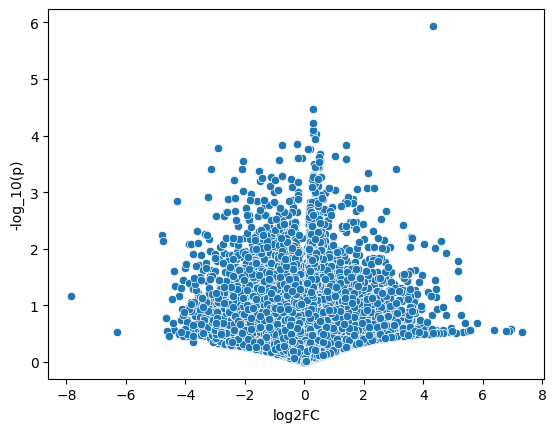

In [45]:
import seaborn as sns

sns.scatterplot(data=df, x="log2FC", y="-log_10(p)")

As this plot is hard to interpet, we want to bring some color in. We do this by adding a further colum, that holds a string for the following categories:

- "Stable": All genes, that do not change significantly (p> 0.01)
- "Up": All genes, hate change significantly upwards
- "Down": All genes, hate change significantly downwards

✍️ **Task**

Write a function that returns these strings bases on the variables `p-values` and `log2FC`:

In [ ]:
def volcano_importance(p_value, log2FC):
  """ Returns the categroy of the gene based in the p-value and log2FC"""

In [46]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

def volcano_importance(p_value, log2FC):
  if p_value > 0.01:
    return "Stable"
  elif log2FC > 0:
    return "Up"
  elif log2FC < 0:
    return "Down"


We can use the `.apply()` function to create the new row based on our function:

In [47]:
df["judgement"] = df.apply(lambda x: volcano_importance(x["p-value"],x["log2FC"]),axis=1)
df

,NAME,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63,Mean_Control,Mean_Treatment,log2FC,p-value,-log_10(p),judgement
0,DDX11L1,0.000000,0.000000,0.000000,0.000000,1.025659,0.000000,2.160159,0.000000,1.434665,0.286933,0.796455,1.472878,0.390805,0.408040,Stable
1,WASH7P,23.286576,26.391825,13.629300,27.278400,13.333567,36.176008,24.841831,28.991420,27.258634,29.219257,18.772819,-0.638274,0.017463,1.757888,Stable
2,MIR6859-1,1.164329,5.460378,4.193631,6.418447,10.256590,1.644364,9.720717,1.610634,12.911985,5.609162,6.333817,0.175290,0.818494,0.086984,Stable
9,AL627309.1,2.328658,0.910063,1.048408,12.034588,1.025659,3.288728,10.800796,0.000000,2.869330,3.820542,3.800880,-0.007444,0.995252,0.002067,Stable
12,AL627309.6,9.314630,5.460378,8.387261,27.278400,10.256590,27.132006,18.361354,4.831903,11.477320,15.236001,11.579959,-0.395854,0.564091,0.248651,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58722,AC023491.1,0.000000,0.000000,0.000000,1.604612,0.000000,0.000000,0.000000,0.000000,0.000000,0.320922,0.000000,-inf,0.407084,0.390316,Stable
58724,AC004556.1,52.394796,55.513839,74.436944,44.929129,52.308610,0.000000,29.162150,100.664654,0.000000,40.221524,52.075625,0.372640,0.620923,0.206962,Stable
58729,AC233755.1,0.000000,14.561007,0.000000,6.418447,0.000000,9.044002,5.400398,0.000000,0.000000,6.004691,1.350100,-2.153024,0.209635,0.678535,Stable
58730,AC240274.1,353.955955,260.277999,223.310833,286.423199,366.160268,120.038571,224.656561,260.922783,278.324999,241.197510,292.020904,0.275857,0.334730,0.475305,Stable


We use, the new colum `judgement` as a hue to plot the results:

<Axes: xlabel='log2FC', ylabel='-log_10(p)'>

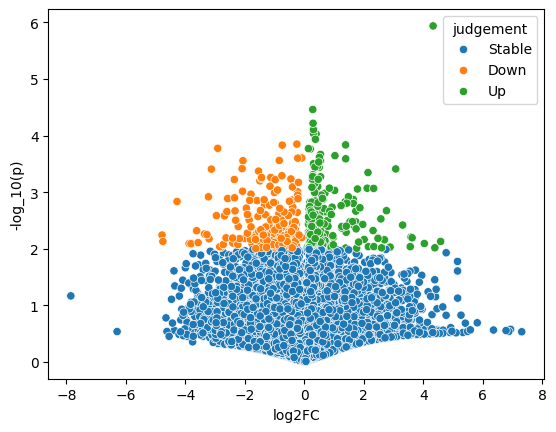

In [48]:
import seaborn as sns

sns.scatterplot(data=df, x="log2FC", y="-log_10(p)", hue = "judgement")

### 🏁 Recap

- 🟥 If you have not finished the tasks, place the red card on top.
- 🟩 If you have finished the tasks and have no questions and want to proceed, place the green card on top.
- 🟨 If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

✍️ **Task**

- Select one example of an down-regulated gene with no siginficant effect, why is this not significant?

In [49]:
df[(df["p-value"]>0.05) & (df["judgement"]=="Stable")]
# 	AL627309.6	is downward (log2FC = -0.395854)

,NAME,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63,Mean_Control,Mean_Treatment,log2FC,p-value,-log_10(p),judgement
0,DDX11L1,0.000000,0.000000,0.000000,0.000000,1.025659,0.000000,2.160159,0.000000,1.434665,0.286933,0.796455,1.472878,0.390805,0.408040,Stable
2,MIR6859-1,1.164329,5.460378,4.193631,6.418447,10.256590,1.644364,9.720717,1.610634,12.911985,5.609162,6.333817,0.175290,0.818494,0.086984,Stable
9,AL627309.1,2.328658,0.910063,1.048408,12.034588,1.025659,3.288728,10.800796,0.000000,2.869330,3.820542,3.800880,-0.007444,0.995252,0.002067,Stable
12,AL627309.6,9.314630,5.460378,8.387261,27.278400,10.256590,27.132006,18.361354,4.831903,11.477320,15.236001,11.579959,-0.395854,0.564091,0.248651,Stable
13,AL627309.7,4.657315,12.740881,7.338854,17.650729,7.179613,21.376732,15.121115,8.858490,8.607990,13.846964,8.574224,-0.691492,0.171524,0.765675,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58722,AC023491.1,0.000000,0.000000,0.000000,1.604612,0.000000,0.000000,0.000000,0.000000,0.000000,0.320922,0.000000,-inf,0.407084,0.390316,Stable
58724,AC004556.1,52.394796,55.513839,74.436944,44.929129,52.308610,0.000000,29.162150,100.664654,0.000000,40.221524,52.075625,0.372640,0.620923,0.206962,Stable
58729,AC233755.1,0.000000,14.561007,0.000000,6.418447,0.000000,9.044002,5.400398,0.000000,0.000000,6.004691,1.350100,-2.153024,0.209635,0.678535,Stable
58730,AC240274.1,353.955955,260.277999,223.310833,286.423199,366.160268,120.038571,224.656561,260.922783,278.324999,241.197510,292.020904,0.275857,0.334730,0.475305,Stable


In [50]:
df[(df["p-value"]<0.05) & (df["judgement"]=="Up") & (df["log2FC"]!=float("inf"))].sort_values(by = "log2FC")
# PRSS35	is upward (log2FC = -0.395854)

,NAME,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63,Mean_Control,Mean_Treatment,log2FC,p-value,-log_10(p),judgement
9018,TRIP12,4911.138879,4608.558702,4857.272720,4648.560266,4633.927423,4384.696570,4962.965855,4598.361399,4431.680017,4534.371391,4841.326219,0.094500,0.009773,2.009962,Up
729,KDM1A,1676.633472,1464.291262,1540.110863,1473.835901,1540.539838,1512.814868,1568.275609,1436.685943,1438.968941,1465.319383,1581.389946,0.109978,0.009118,2.040087,Up
17709,CNOT6,839.481065,799.035257,857.597471,784.655150,865.656207,782.717258,813.299954,743.307806,734.548452,768.852785,844.008674,0.134550,0.003660,2.436460,Up
10463,TMF1,3083.142662,2762.041007,3069.737648,2727.839990,3018.514477,2807.751507,3080.387077,2717.140343,2893.719195,2781.698408,3062.945466,0.138954,0.000170,3.769406,Up
49183,EFTUD2,1300.555270,1122.107599,1255.992385,1191.424231,1289.253380,1169.964977,1203.208697,1108.116512,1127.646647,1143.851993,1262.252433,0.142100,0.002736,2.562918,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12537,PPP2R2C,13.971946,0.000000,18.871338,0.802306,12.307908,1.644364,35.642627,0.000000,5.738660,1.637066,20.198455,3.625061,0.006407,2.193340,Up
24805,AL391294.1,4.657315,0.910063,2.096815,0.000000,4.102636,0.000000,1.080080,0.000000,0.000000,0.182013,2.984212,4.035240,0.008086,2.092249,Up
45967,SNORA30,3.492986,0.000000,3.145223,0.000000,3.076977,0.000000,3.240239,0.805317,0.000000,0.161063,3.238856,4.329783,0.000001,5.937225,Up
2890,PDZK1,2.328658,0.000000,5.242038,0.000000,5.128295,0.822182,1.080080,0.000000,0.000000,0.164436,3.444768,4.388805,0.009614,2.017082,Up


In [51]:
df[df["NAME"]=="KRAS"]

,NAME,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63,Mean_Control,Mean_Treatment,log2FC,p-value,-log_10(p),judgement
36787,KRAS,650.859799,441.380523,633.238231,454.907434,617.446726,449.73355,896.466085,445.34043,545.172679,467.306923,699.50271,0.581959,0.007265,2.138779,Up


For instance, we find `KRAS` to be significantly up-regulated. This gene is known to be involved in [lung cancer](https://lcfamerica.org/about-lung-cancer/diagnosis/biomarkers/kras/).

### 🏁 Recap

- 🟥 If you have not finished the tasks, place the red card on top.
- 🟩 If you have finished the tasks and have no questions and want to proceed, place the green card on top.
- 🟨 If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

## 3.6.3 Heat Maps

✍️ **Task**

Our next task is to create a meanningful heat map for the data. We create a cluster-heatmap with the 50 genes with the highest change in expression. In addition, we build a cluster for the similarity of the observations. Do You find, that the heat map clusters the treatment and the control group correctly?



### Filter the Data

First, select only the data with a p-value larger than 5% and with the highest absolute expression. Than sort the values by highest absolute expression and take the first 50 values.

Store the results in `df_subsample`

*Hint*: You can do the filtering step by step. You can use the following filters:

- Remove the `inf` values `df_subsample["log2FC"]!=float("-inf")]`
- Take only singificant changes (`df_subsample["p-value"]<0.05`)
- Create a colum that allow to order You by positive and negative change (`df_subsample["log2FC"]**2` or the absolute value)
- Sort the values (`df_subsample.sort_values(by = "log2FC2")`)
- take the `head(50)` or `tail(50)`

In [52]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Define the numbers of genes we want to analyze
no_of_relevant_genes = 50

# make a copy of the original dataframe
df_subsample = df.copy()

# remove the non-numeric values
# however, these values indicate large changes, so we could also replace the infinity with a lage number
df_subsample = df_subsample[df_subsample["log2FC"]!=float("-inf")]
df_subsample = df_subsample[df_subsample["log2FC"]!=float("inf")]

# remove everything with a p-value smaller 5%
df_subsample = df_subsample[df_subsample["p-value"]<0.05]

# create a variable that allows the sort positive and negative changes at once
df_subsample["log2FC2"] = df_subsample["log2FC"]**2

# sort and select the top 50 values
df_subsample = df_subsample.sort_values(by = "log2FC2").tail(no_of_relevant_genes)

# Reset the index, so it is the gene name
df_subsample = df_subsample.set_index("NAME")

df_subsample


,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63,Mean_Control,Mean_Treatment,log2FC,p-value,-log_10(p),judgement,log2FC2
NAME,,,,,,,,,,,,,,,,
AC008752.1,1.164329,5.460378,1.048408,5.616141,0.000000,2.466546,0.000000,8.858490,4.303995,5.341110,0.553184,-3.271308,0.005640,2.248698,Down,10.701455
AL592429.2,0.000000,1.820126,1.048408,4.011529,0.000000,0.000000,0.000000,4.026586,2.869330,2.545514,0.262102,-3.279757,0.036997,1.431830,Stable,10.756808
RF00019.119,8.150302,0.000000,5.242038,0.802306,0.000000,0.000000,5.400398,1.610634,0.000000,0.482588,4.698185,3.283239,0.028966,1.538113,Stable,10.779660
ABCA17P,0.000000,5.460378,2.096815,2.406918,0.000000,2.466546,0.000000,9.663807,5.738660,5.147262,0.524204,-3.295605,0.022159,1.654448,Stable,10.861014
AC104462.1,2.328658,0.000000,1.048408,0.000000,2.051318,0.822182,1.080080,0.000000,0.000000,0.164436,1.627116,3.306715,0.003818,2.418189,Up,10.934366
OR13C1P,0.000000,1.820126,0.000000,0.802306,0.000000,2.466546,1.080080,4.026586,4.303995,2.683912,0.270020,-3.313200,0.018145,1.741244,Stable,10.977291
CEACAM5,4804.020629,941.915138,9342.360719,259.144799,2596.968622,1516.925778,16518.737710,136.903930,1215.161209,814.010171,8315.521920,3.352688,0.028050,1.552067,Stable,11.240517
ANGPTL1,2.328658,2.730189,0.000000,6.418447,0.000000,9.044002,0.000000,7.247855,4.303995,5.948898,0.582164,-3.353124,0.005486,2.260756,Down,11.243439
GPR151,3.492986,0.000000,1.048408,0.000000,1.025659,0.000000,1.080080,0.805317,0.000000,0.161063,1.661783,3.367031,0.032975,1.481813,Stable,11.336899


In [53]:
# Drop all Columns not necessary for plotting
df_subsample_to_plot = df_subsample[["Hu28","Hu35","Hu40", "Hu44",	"Hu51",	"Hu52",	"Hu53",	"Hu56", "Hu63"]]
df_subsample_to_plot.head()

,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63
NAME,,,,,,,,,
AC008752.1,1.164329,5.460378,1.048408,5.616141,0.000000,2.466546,0.000000,8.858490,4.303995
AL592429.2,0.000000,1.820126,1.048408,4.011529,0.000000,0.000000,0.000000,4.026586,2.869330
RF00019.119,8.150302,0.000000,5.242038,0.802306,0.000000,0.000000,5.400398,1.610634,0.000000
ABCA17P,0.000000,5.460378,2.096815,2.406918,0.000000,2.466546,0.000000,9.663807,5.738660
AC104462.1,2.328658,0.000000,1.048408,0.000000,2.051318,0.822182,1.080080,0.000000,0.000000


### 🏁 Recap

- 🟥 If you have not finished the tasks, place the red card on top.
- 🟩 If you have finished the tasks and have no questions and want to proceed, place the green card on top.
- 🟨 If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

### Scaling the Data

Now, we have only the most relevant genes. However, if we look at the data, we see that most of the expression reads are very close to 0 and we have some outliers, with very high reads. Hence, the scatterplot would look not very insightful. Before we create the heatmap, we can take a look at the distribution of the data.

If we take a look on the distribution of the data of the first sample, we see that the data is not normally distributed, but we have two very large outliers.


<Axes: xlabel='Hu28', ylabel='Count'>

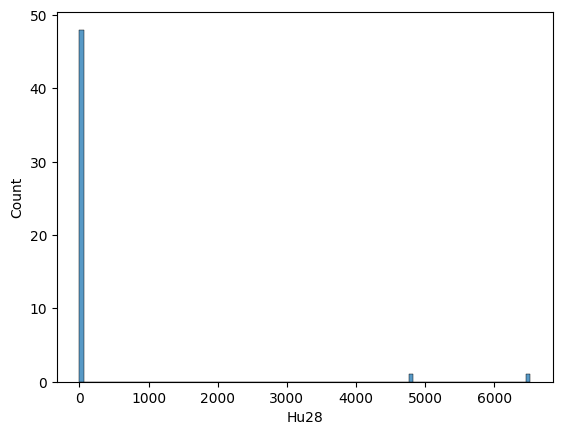

In [57]:
sns.histplot(df_subsample_to_plot["Hu28"],bins=100)

We see a similar pattern with the next sample:

<Axes: xlabel='Hu35', ylabel='Count'>

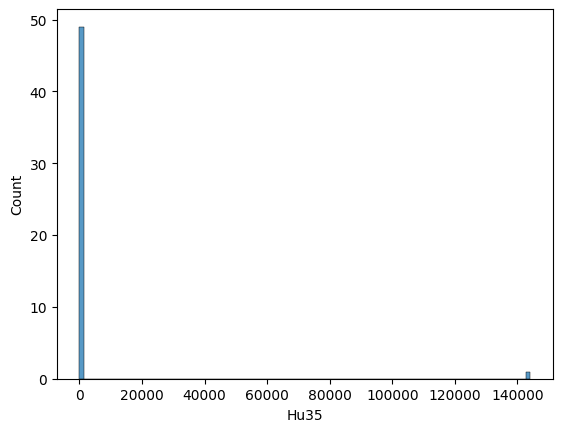

In [58]:
sns.histplot(df_subsample_to_plot["Hu35"],bins=100)

Hence, if we want to create a heatmap without any scaling, the heatmap would be dominated by the outliers:

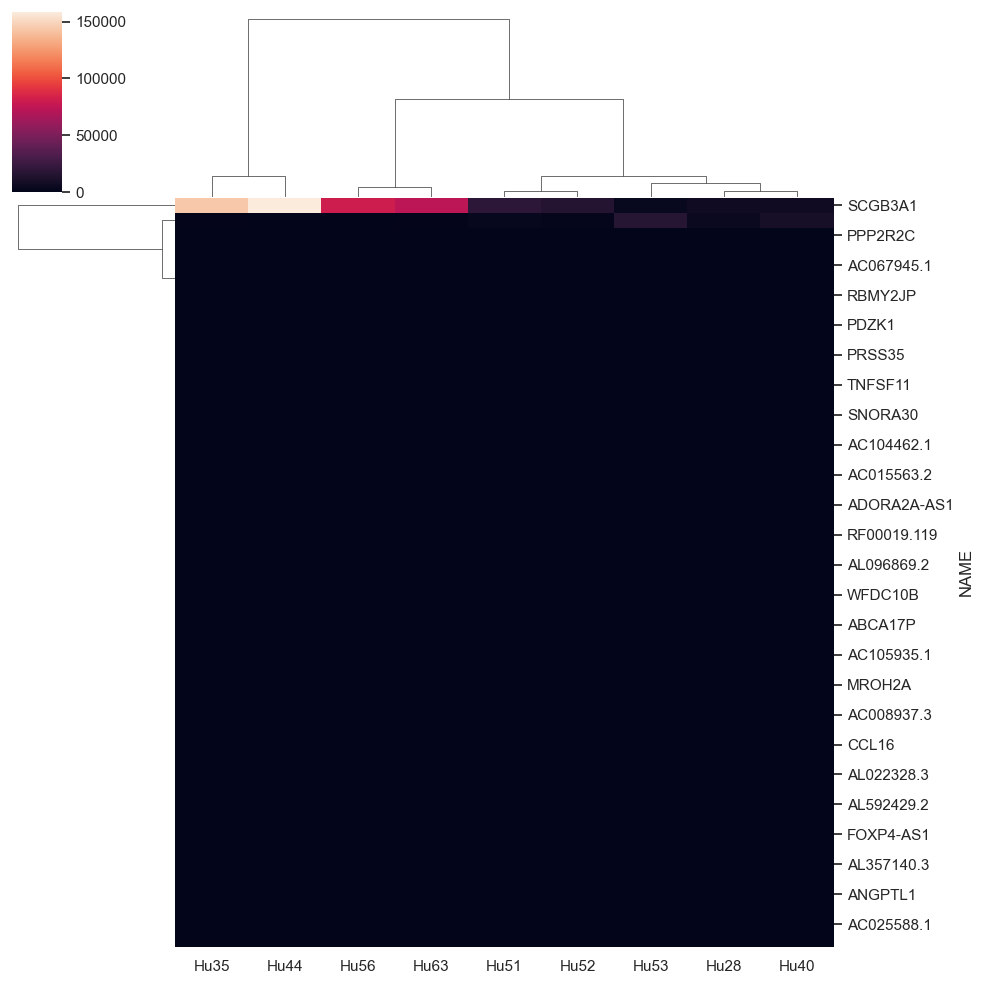

In [59]:
# As special heat map that show the clusters as a dendrogram
import seaborn as sns; sns.set_theme(color_codes=True)

g = sns.clustermap(df_subsample_to_plot)

We learned, that there a may different ways of scaling gene expression data. A simple way to scale the data is the quantile scaler. The quantile scaler takes all the data, sorts it and calcualtes the quantile value for each data point. 

Hence, the highest reads count in the data will be transformed to 1.0 (100% Quantile) and the lowest read count to 0.0 (0% quantile). All the other data points will be somewhere inbetween.

Take note, that we do not scale based on the columns (each column is one person), but along the rows (expression reads for one gene). This allows it to compare the expression of one gene between the different persons.



c:\Users\jlhuber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (9). n_quantiles is set to n_samples.
  warnings.warn(


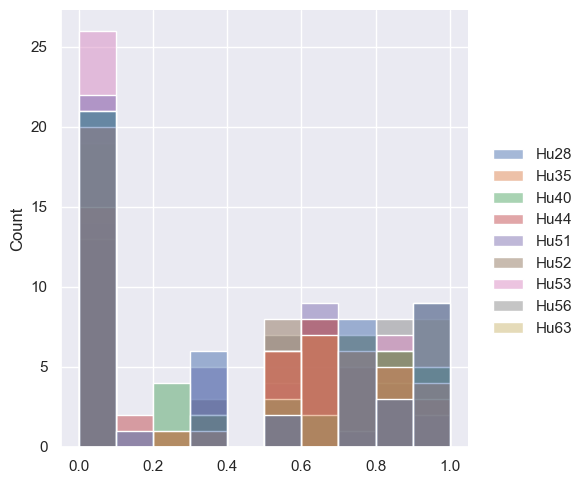

In [62]:
# Loads the quantile scaler
from sklearn.preprocessing import QuantileTransformer

# Defines the quantile scaler
scaler = QuantileTransformer()

# Scales the data
# We transpose the data frame and retranspose it, as the scaler usally works by columns and not by row
X_scaled=pd.DataFrame(scaler.fit_transform(df_subsample_to_plot.T).T,columns=df_subsample_to_plot.columns)

# Resetting the index, that was lost during scaling
X_scaled = X_scaled.set_index(df_subsample_to_plot.index)

# Plotting the new distribution

sns.displot(X_scaled)

In [63]:
X_scaled.head()

,Hu28,Hu35,Hu40,Hu44,Hu51,Hu52,Hu53,Hu56,Hu63
NAME,,,,,,,,,
AC008752.1,0.375,0.750,0.250,0.875,0.000,0.500,0.000,1.000,0.625
AL592429.2,0.000,0.625,0.500,0.875,0.000,0.000,0.000,1.000,0.750
RF00019.119,1.000,0.000,0.750,0.500,0.000,0.000,0.875,0.625,0.000
ABCA17P,0.000,0.750,0.375,0.500,0.000,0.625,0.000,1.000,0.875
AC104462.1,1.000,0.000,0.625,0.000,0.875,0.500,0.750,0.000,0.000


### 🏁 Recap

- 🟥 If you have not finished the tasks, place the red card on top.
- 🟩 If you have finished the tasks and have no questions and want to proceed, place the green card on top.
- 🟨 If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

### Plotting the Cluster-Heat Map

Next, we want to plot a new heatmap based on the scaled values. 

✍️ **Task**

Create a new heat map and check, whether dendrogram clusters the patients from the treatment and the contol group correctly. The dendrograms are the lines on the top and the left side of the heatmap. They connect the most similar observations in a hierarchical clustering.

- Control: Hu63, Hu56, Hu52, Hu44, Hu35, Hu35
- Treatment: Hu53, Hu51, Hu40, Hu28

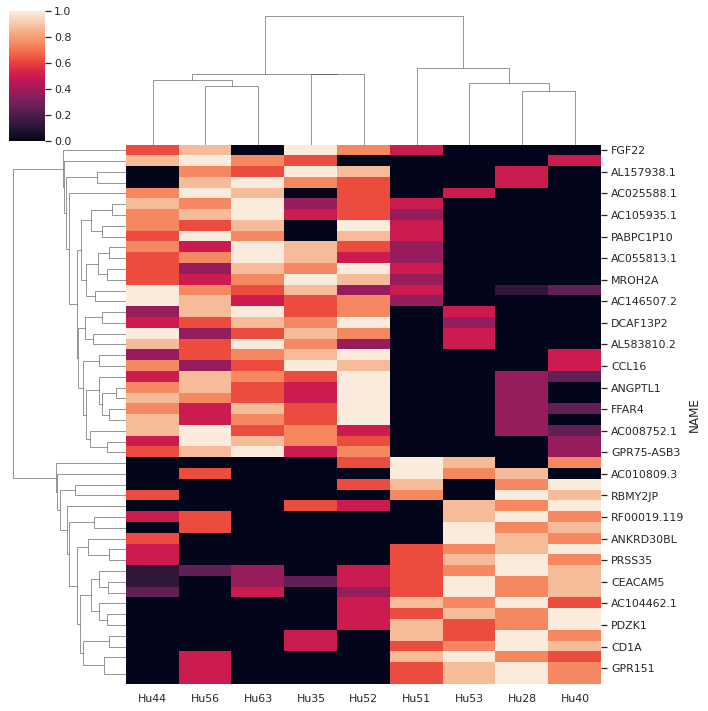

In [132]:
# Loading seaborn
import seaborn as sns; sns.set_theme(color_codes=True)

# Plotting the map
g = sns.clustermap(X_scaled)

# the dentrogram clusters the groups correctly

Recall the groups from the beginning of the task:

```python
control_cols = ["Hu63","Hu56", "Hu52", "Hu44", "Hu35"]
treatment_cols = ["Hu51", "Hu28", "Hu40","Hu53"]
```

While the control group is clustered on the left side, the treatment group is clustered on the right side of the heatmap.

## Summary

Now, You know how You can load differential gene expression data from the GEO-database. You can calculate fold change and sigificance for the different expression levels on individual genes and visualize them in a volcano plot. You can further use heat maps to indicate relative change between individual samples and find groups/clusters within the samples.

### 🏁 Recap

- 🟥 If you have not finished the tasks, place the red card on top.
- 🟩 If you have finished the tasks and have no questions and want to proceed, place the green card on top.
- 🟨 If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.